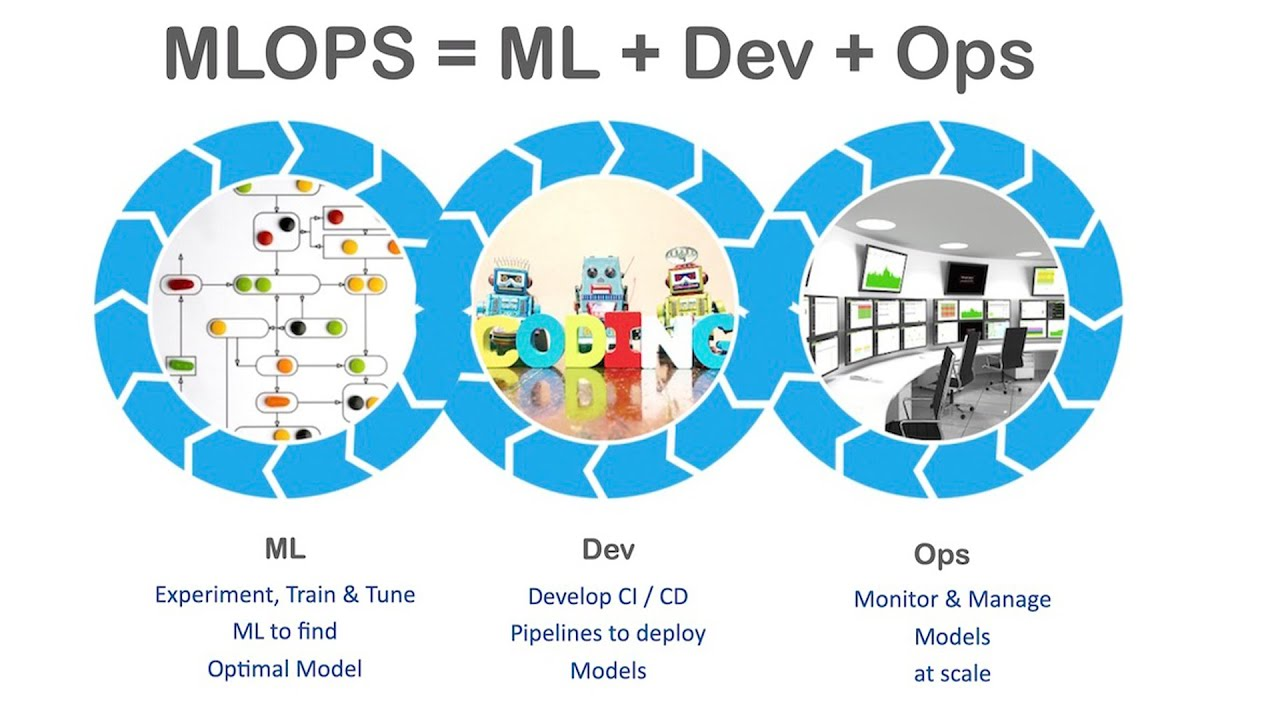

<img src="http://wandb.me/logo-im-png" width="400" alt="Weights & Biases" />

<!--- @wandbcode{intro-colab-keras} -->

# 🏃‍♀️ Quickstart
Use **[Weights & Biases](https://wandb.ai/site?utm_source=keras_intro_colab&utm_medium=code&utm_campaign=keras_intro)** for machine learning experiment tracking, model checkpointing, and collaboration with your team. See the full Weights & Biases Documentation **[here](https://docs.wandb.ai/guides/integrations/keras)**

## 🤩 A shared dashboard for your experiments

With just a few lines of code,
you'll get rich, interactive, shareable dashboards [which you can see yourself here](https://wandb.ai/wandb/wandb_example).
![](https://i.imgur.com/Pell4Oo.png) 


## 🔒 Data & Privacy

We take security very seriously, and our cloud-hosted dashboard uses industry standard best practices for encryption. If you're working with datasets that cannot leave your enterprise cluster, we have [on-prem](https://docs.wandb.com/self-hosted) installations available. 

It's also easy to download all your data and export it to other tools — like custom analysis in a Jupyter notebook. Here's [more on our API](https://docs.wandb.com/library/api).

---

Start by installing the library and logging in to your free account.

In [1]:
!pip install wandb -qU

In [2]:
# Log in to your W&B account
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: sohiletp. Use `wandb login --relogin` to force relogin


True

## 👟 Run an experiment
1️⃣. **Start a new run** and pass in hyperparameters to track

2️⃣. **Log metrics** from training or evaluation

3️⃣. **Visualize results** in the dashboard

In [3]:
import random

# Launch 5 simulated experiments
for run in range(5):
    # 1️⃣ Start a new run to track this script
    wandb.init(
        project="basic-intro",
        config={
            "learning_rate": 0.02,
            "architecture": "CNN",
            "dataset": "CIFAR-100",
        },
    )

    # This simple block simulates a training loop logging metrics
    offset = random.random() / 5
    for ii in range(2, 10):
        acc = 1 - 2**-ii - random.random() / ii - offset
        loss = 2**-ii + random.random() / ii + offset
        # 2️⃣ Log metrics from your script to W&B
        wandb.log({"acc": acc, "loss": loss})

    wandb.finish()

acc,▁▃▇▇███▆
loss,█▅▆▄▁▃▂▂
acc,0.90644
loss,0.11429


acc,▁▄▅█▇███
loss,▇█▅▅▁▁▁▃
acc,0.87344
loss,0.14681


acc,▁▇▆██▇██
loss,█▆▃▃▁▁▁▂
acc,0.75351
loss,0.28503


acc,▁▃▇▅▆▇██
loss,█▃▇▅▂▃▁▃
acc,0.91693
loss,0.14228


acc,▁▇▇▆█▇▇█
loss,█▆█▄▅▁▁▃
acc,0.87454
loss,0.17698


# 🥕 Simple Keras Classifier
Run this model to train a simple MNIST classifier, and click on the project page link to see your results stream in live to a W&B project. For a full guide on how to use Weights & Biases with Keras, **[see here](https://docs.wandb.ai/guides/integrations/keras)**


In [4]:
import random
import numpy as np
import tensorflow as tf
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

# Simple Keras Model

# Launch 5 experiments, trying different dropout rates
for run in range(5):
    # Start a run, tracking hyperparameters
    wandb.init(
        project="keras-intro",
        config={
            "layer_1": 512,
            "activation_1": "relu",
            "dropout": random.uniform(0.01, 0.80),
            "layer_2": 10,
            "activation_2": "softmax",
            "optimizer": "sgd",
            "loss": "sparse_categorical_crossentropy",
            "metric": "accuracy",
            "epoch": 6,
            "batch_size": 256,
        },
    )
    config = wandb.config

    # Get the data
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    x_train, y_train = x_train[::5], y_train[::5]  # Subset data for a faster demo
    x_test, y_test = x_test[::20], y_test[::20]
    labels = [str(digit) for digit in range(np.max(y_train) + 1)]

    # Build a model
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
            tf.keras.layers.Dropout(config.dropout),
            tf.keras.layers.Dense(config.layer_2, activation=config.activation_2),
        ]
    )

    model.compile(optimizer=config.optimizer, loss=config.loss, metrics=[config.metric])

    # Add WandbMetricsLogger to log metrics and WandbModelCheckpoint to log model checkpoints
    wandb_callbacks = [
        WandbMetricsLogger(),
        WandbModelCheckpoint(filepath="my_model_{epoch:02d}"),
    ]

    model.fit(
        x=x_train,
        y=y_train,
        epochs=config.epoch,
        batch_size=config.batch_size,
        validation_data=(x_test, y_test),
        callbacks=wandb_callbacks,
    )

    # Mark the run as finished
    wandb.finish()

Epoch 1/6
46/47 [============================>.] - ETA: 0s - loss: 2.0954 - accuracy: 0.2925

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


47/47 [==============================] - 3s 47ms/step - loss: 2.0900 - accuracy: 0.2973 - val_loss: 1.8469 - val_accuracy: 0.5620
Epoch 2/6
44/47 [===========================>..] - ETA: 0s - loss: 1.7030 - accuracy: 0.5713

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


47/47 [==============================] - 2s 44ms/step - loss: 1.6937 - accuracy: 0.5754 - val_loss: 1.5006 - val_accuracy: 0.6980
Epoch 3/6
45/47 [===========================>..] - ETA: 0s - loss: 1.4034 - accuracy: 0.6786

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


47/47 [==============================] - 2s 45ms/step - loss: 1.3999 - accuracy: 0.6792 - val_loss: 1.2454 - val_accuracy: 0.7480
Epoch 4/6
47/47 [==============================] - ETA: 0s - loss: 1.1876 - accuracy: 0.7297

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


47/47 [==============================] - 3s 62ms/step - loss: 1.1876 - accuracy: 0.7297 - val_loss: 1.0621 - val_accuracy: 0.7920
Epoch 5/6
45/47 [===========================>..] - ETA: 0s - loss: 1.0385 - accuracy: 0.7605

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


47/47 [==============================] - 2s 39ms/step - loss: 1.0360 - accuracy: 0.7607 - val_loss: 0.9325 - val_accuracy: 0.8020
Epoch 6/6
46/47 [============================>.] - ETA: 0s - loss: 0.9251 - accuracy: 0.7854

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


47/47 [==============================] - 2s 40ms/step - loss: 0.9233 - accuracy: 0.7859 - val_loss: 0.8367 - val_accuracy: 0.8100


epoch/accuracy,▁▅▆▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▁
epoch/val_accuracy,▁▅▆▇██
epoch/val_loss,█▆▄▃▂▁
epoch/accuracy,0.78592
epoch/epoch,5
epoch/learning_rate,0.01
epoch/loss,0.92325
epoch/val_accuracy,0.81


Epoch 1/6
47/47 [==============================] - ETA: 0s - loss: 2.2992 - accuracy: 0.1724

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


47/47 [==============================] - 2s 42ms/step - loss: 2.2992 - accuracy: 0.1724 - val_loss: 1.8929 - val_accuracy: 0.5740
Epoch 2/6
46/47 [============================>.] - ETA: 0s - loss: 1.8940 - accuracy: 0.3686

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.8922 - accuracy: 0.3692 - val_loss: 1.5687 - val_accuracy: 0.7120
Epoch 3/6
45/47 [===========================>..] - ETA: 0s - loss: 1.6155 - accuracy: 0.5121

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


47/47 [==============================] - 2s 41ms/step - loss: 1.6121 - accuracy: 0.5130 - val_loss: 1.3261 - val_accuracy: 0.7800
Epoch 4/6
46/47 [============================>.] - ETA: 0s - loss: 1.4096 - accuracy: 0.5874

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


47/47 [==============================] - 2s 54ms/step - loss: 1.4075 - accuracy: 0.5888 - val_loss: 1.1440 - val_accuracy: 0.8020
Epoch 5/6
45/47 [===========================>..] - ETA: 0s - loss: 1.2561 - accuracy: 0.6383

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


47/47 [==============================] - 3s 59ms/step - loss: 1.2538 - accuracy: 0.6392 - val_loss: 1.0073 - val_accuracy: 0.8080
Epoch 6/6
46/47 [============================>.] - ETA: 0s - loss: 1.1471 - accuracy: 0.6694

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


47/47 [==============================] - 2s 37ms/step - loss: 1.1468 - accuracy: 0.6693 - val_loss: 0.9039 - val_accuracy: 0.8160


epoch/accuracy,▁▄▆▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▁
epoch/val_accuracy,▁▅▇███
epoch/val_loss,█▆▄▃▂▁
epoch/accuracy,0.66933
epoch/epoch,5
epoch/learning_rate,0.01
epoch/loss,1.14682
epoch/val_accuracy,0.816


Epoch 1/6
46/47 [============================>.] - ETA: 0s - loss: 2.0954 - accuracy: 0.2865

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


47/47 [==============================] - 3s 60ms/step - loss: 2.0917 - accuracy: 0.2893 - val_loss: 1.8352 - val_accuracy: 0.5640
Epoch 2/6
46/47 [============================>.] - ETA: 0s - loss: 1.6921 - accuracy: 0.5588

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


47/47 [==============================] - 2s 41ms/step - loss: 1.6901 - accuracy: 0.5592 - val_loss: 1.4900 - val_accuracy: 0.7080
Epoch 3/6
46/47 [============================>.] - ETA: 0s - loss: 1.4067 - accuracy: 0.6674

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


47/47 [==============================] - 2s 37ms/step - loss: 1.4043 - accuracy: 0.6680 - val_loss: 1.2407 - val_accuracy: 0.7660
Epoch 4/6
45/47 [===========================>..] - ETA: 0s - loss: 1.2019 - accuracy: 0.7183

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.2000 - accuracy: 0.7188 - val_loss: 1.0619 - val_accuracy: 0.7980
Epoch 5/6
47/47 [==============================] - ETA: 0s - loss: 1.0500 - accuracy: 0.7507

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.0500 - accuracy: 0.7507 - val_loss: 0.9335 - val_accuracy: 0.8100
Epoch 6/6
47/47 [==============================] - ETA: 0s - loss: 0.9438 - accuracy: 0.7709

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


47/47 [==============================] - 2s 35ms/step - loss: 0.9438 - accuracy: 0.7709 - val_loss: 0.8389 - val_accuracy: 0.8160


epoch/accuracy,▁▅▇▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▁
epoch/val_accuracy,▁▅▇▇██
epoch/val_loss,█▆▄▃▂▁
epoch/accuracy,0.77092
epoch/epoch,5
epoch/learning_rate,0.01
epoch/loss,0.94385
epoch/val_accuracy,0.816


Epoch 1/6
44/47 [===========================>..] - ETA: 0s - loss: 2.1112 - accuracy: 0.2692

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


47/47 [==============================] - 3s 52ms/step - loss: 2.0971 - accuracy: 0.2785 - val_loss: 1.8048 - val_accuracy: 0.6700
Epoch 2/6
45/47 [===========================>..] - ETA: 0s - loss: 1.6946 - accuracy: 0.5532

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.6861 - accuracy: 0.5579 - val_loss: 1.4532 - val_accuracy: 0.7520
Epoch 3/6
45/47 [===========================>..] - ETA: 0s - loss: 1.3949 - accuracy: 0.6725

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.3906 - accuracy: 0.6732 - val_loss: 1.2013 - val_accuracy: 0.7780
Epoch 4/6
47/47 [==============================] - ETA: 0s - loss: 1.1825 - accuracy: 0.7232

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


47/47 [==============================] - 2s 39ms/step - loss: 1.1825 - accuracy: 0.7232 - val_loss: 1.0264 - val_accuracy: 0.8000
Epoch 5/6
45/47 [===========================>..] - ETA: 0s - loss: 1.0375 - accuracy: 0.7561

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


47/47 [==============================] - 3s 59ms/step - loss: 1.0348 - accuracy: 0.7576 - val_loss: 0.9011 - val_accuracy: 0.8040
Epoch 6/6
47/47 [==============================] - ETA: 0s - loss: 0.9300 - accuracy: 0.7750

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


47/47 [==============================] - 2s 52ms/step - loss: 0.9300 - accuracy: 0.7750 - val_loss: 0.8103 - val_accuracy: 0.8160


epoch/accuracy,▁▅▇▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▁
epoch/val_accuracy,▁▅▆▇▇█
epoch/val_loss,█▆▄▃▂▁
epoch/accuracy,0.775
epoch/epoch,5
epoch/learning_rate,0.01
epoch/loss,0.93002
epoch/val_accuracy,0.816


Epoch 1/6
47/47 [==============================] - ETA: 0s - loss: 2.0641 - accuracy: 0.3562

wandb: Adding directory to artifact (./my_model_01)... Done. 0.0s


47/47 [==============================] - 3s 54ms/step - loss: 2.0641 - accuracy: 0.3562 - val_loss: 1.8281 - val_accuracy: 0.5680
Epoch 2/6
47/47 [==============================] - ETA: 0s - loss: 1.6393 - accuracy: 0.6379

wandb: Adding directory to artifact (./my_model_02)... Done. 0.0s


47/47 [==============================] - 2s 51ms/step - loss: 1.6393 - accuracy: 0.6379 - val_loss: 1.4599 - val_accuracy: 0.6980
Epoch 3/6
45/47 [===========================>..] - ETA: 0s - loss: 1.3350 - accuracy: 0.7312

wandb: Adding directory to artifact (./my_model_03)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 1.3302 - accuracy: 0.7319 - val_loss: 1.1965 - val_accuracy: 0.7660
Epoch 4/6
44/47 [===========================>..] - ETA: 0s - loss: 1.1191 - accuracy: 0.7784

wandb: Adding directory to artifact (./my_model_04)... Done. 0.0s


47/47 [==============================] - 2s 36ms/step - loss: 1.1142 - accuracy: 0.7788 - val_loss: 1.0141 - val_accuracy: 0.7900
Epoch 5/6
47/47 [==============================] - ETA: 0s - loss: 0.9603 - accuracy: 0.8070

wandb: Adding directory to artifact (./my_model_05)... Done. 0.0s


47/47 [==============================] - 2s 38ms/step - loss: 0.9603 - accuracy: 0.8070 - val_loss: 0.8872 - val_accuracy: 0.8060
Epoch 6/6
47/47 [==============================] - ETA: 0s - loss: 0.8513 - accuracy: 0.8242

wandb: Adding directory to artifact (./my_model_06)... Done. 0.0s


47/47 [==============================] - 2s 41ms/step - loss: 0.8513 - accuracy: 0.8242 - val_loss: 0.7960 - val_accuracy: 0.8040


epoch/accuracy,▁▅▇▇██
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▁
epoch/val_accuracy,▁▅▇███
epoch/val_loss,█▆▄▂▂▁
epoch/accuracy,0.82425
epoch/epoch,5
epoch/learning_rate,0.01
epoch/loss,0.8513
epoch/val_accuracy,0.804


You have now trained your first model using wandb! 👆 Click on the wandb link above to see your metrics.

For a full guide on how to use Weights & Biases with Keras, **[see here](https://docs.wandb.ai/guides/integrations/keras)**

# 🔔 Try W&B Alerts

**[W&B Alerts](https://docs.wandb.ai/guides/track/alert)** allows you to send alerts, triggered from your Python code, to your Slack or email. There are 2 steps to follow the first time you'd like to send a Slack or email alert, triggered from your code:

1) Turn on Alerts in your W&B [User Settings](https://wandb.ai/settings)

2) Add `wandb.alert()` to your code:

```python
wandb.alert(
    title="Low accuracy", 
    text=f"Accuracy is below the acceptable threshold"
)
```

See the minimal example below to see how to use `wandb.alert`. You can find the full docs for **[W&B Alerts here](https://docs.wandb.ai/guides/track/alert)**

In [5]:
# Start a wandb run
wandb.init(project="keras-intro")

# Simulating a model training loop
acc_threshold = 0.3
for training_step in range(1000):

    # Generate a random number for accuracy
    accuracy = round(random.random() + random.random(), 3)
    print(f"Accuracy is: {accuracy}, {acc_threshold}")

    # 🐝 Log accuracy to wandb
    wandb.log({"Accuracy": accuracy})

    # 🔔 If the accuracy is below the threshold, fire a W&B Alert and stop the run
    if accuracy <= acc_threshold:
        # 🐝 Send the wandb Alert
        wandb.alert(
            title="Low Accuracy",
            text=f"Accuracy {accuracy} at step {training_step} is below the acceptable theshold, {acc_threshold}",
        )
        print("Alert triggered")
        break

# Mark the run as finished (useful in Jupyter notebooks)
wandb.finish()

Accuracy is: 0.58, 0.3
Accuracy is: 0.752, 0.3
Accuracy is: 0.956, 0.3
Accuracy is: 1.376, 0.3
Accuracy is: 0.202, 0.3
Alert triggered


Accuracy,▃▄▅█▁
Accuracy,0.202
